# Comparing Manual and SelfLearningClassifier Pseudo Label

## Set up

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

PATH = Path.cwd().parents[2]

import sys
sys.path.append(str(PATH))

from scripts.utils.comparing import prepare_filepath_list, get_report_all_ml
from scripts.feature_extractions.tf_idf import get_tf_idf_vector, extract_tf_idf_for_unlabeled

In [3]:
DATA_PATH = os.path.join(PATH, 'data')
name = "crpwarner"
EX_PATH = os.path.join(DATA_PATH, f'external/{name}')
MERGE_PATH = os.path.join(EX_PATH, 'merged')
LARGE_PATH = os.path.join(EX_PATH, 'large')
PSEUDO_LABEL_PATH = os.path.join(DATA_PATH, f'interim/{name}/pseudo-label')

In [4]:
mint_df = pd.read_csv(os.path.join(MERGE_PATH, 'mint.csv')).set_index('address')
manual_df = pd.read_csv(os.path.join(PSEUDO_LABEL_PATH, 'mint.csv')).set_index('address')
self_df = pd.read_csv(os.path.join(PSEUDO_LABEL_PATH, 'mint-self-learning.csv')).set_index('address')

In [5]:
gt_train, gt_test = train_test_split(mint_df, test_size=0.3, stratify=mint_df["TP?"], random_state=42)

In [6]:
test_sol_files, mint_hex_files, _, _ = prepare_filepath_list(MERGE_PATH, gt_test)
man_sol_files, man_hex_files, man_train, _ = prepare_filepath_list(LARGE_PATH, pd.concat([gt_train, manual_df]))
self_sol_files, man_hex_files, self_train, _ = prepare_filepath_list(LARGE_PATH, pd.concat([gt_train, self_df]))

In [7]:
max_feature = 5000

In [8]:
X_man, man_cols = get_tf_idf_vector(man_sol_files, max_feature)
X_self, self_cols = get_tf_idf_vector(self_sol_files, max_feature)
X_test_man = extract_tf_idf_for_unlabeled(test_sol_files, man_cols)
X_test_self = extract_tf_idf_for_unlabeled(test_sol_files, self_cols)

  0%|          | 0/2827 [00:00<?, ?it/s]

100%|██████████| 49/49 [00:00<00:00, 12235.57it/s]


In [9]:
y_test = np.array([gt_test['TP?']]).T
y_man = np.array([man_train['TP?']]).T
y_self = np.array([self_train['TP?']]).T

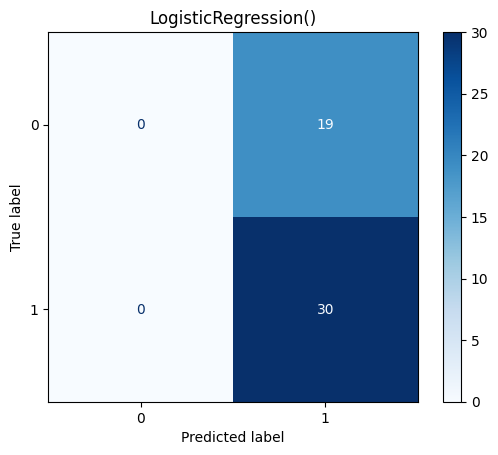

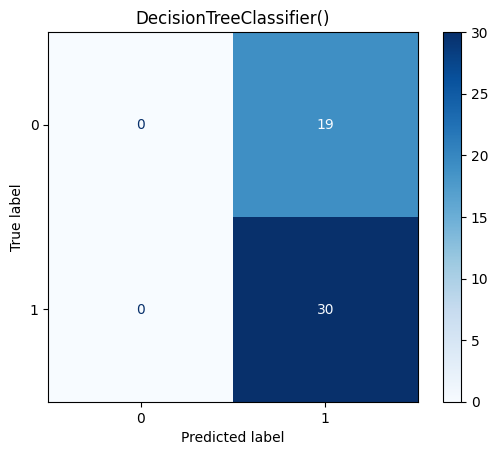

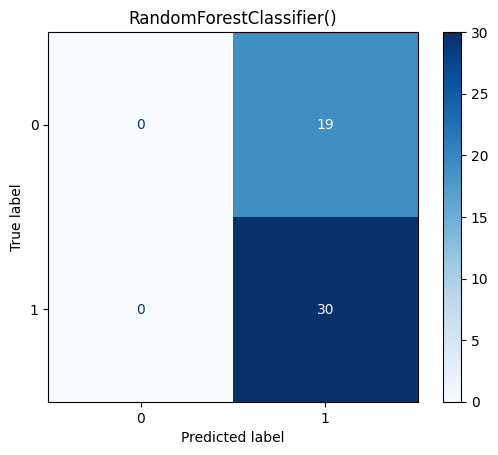

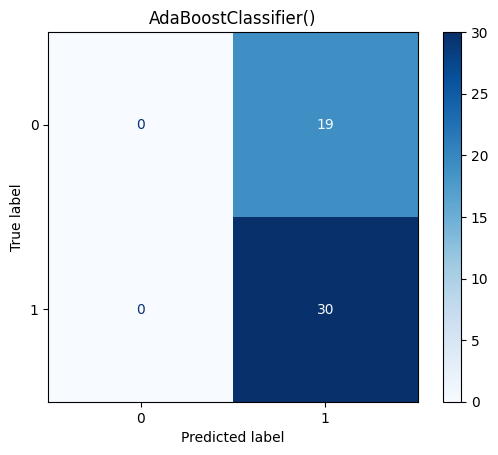

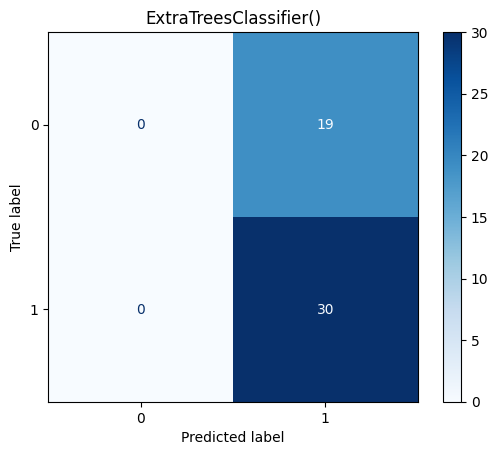

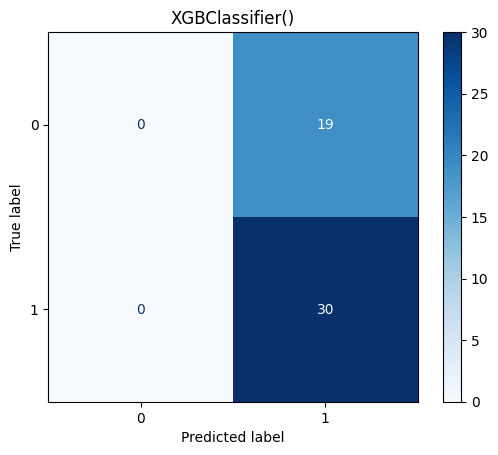

[LightGBM] [Info] Number of positive: 2817, number of negative: 10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87992
[LightGBM] [Info] Number of data points in the train set: 2827, number of used features: 1927
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.996463 -> initscore=5.640843
[LightGBM] [Info] Start training from score 5.640843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

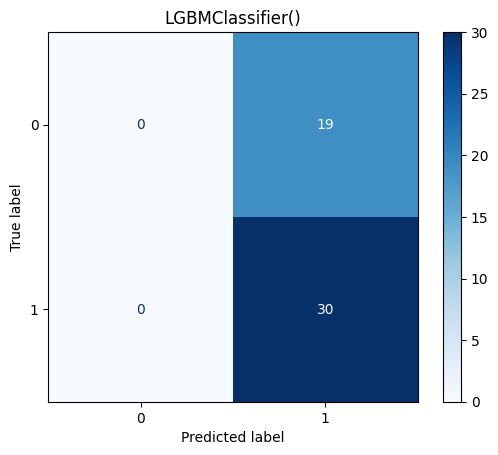

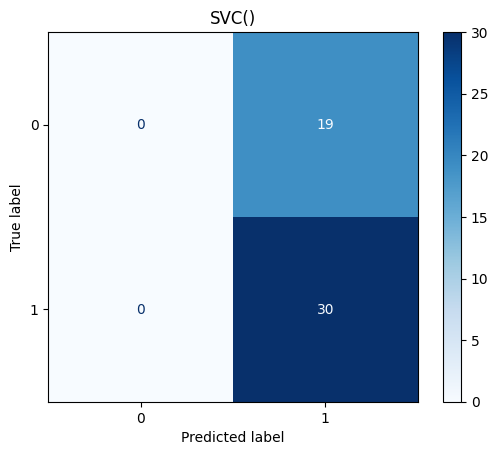

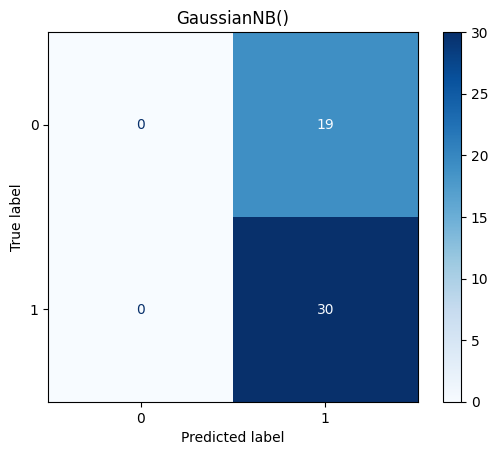

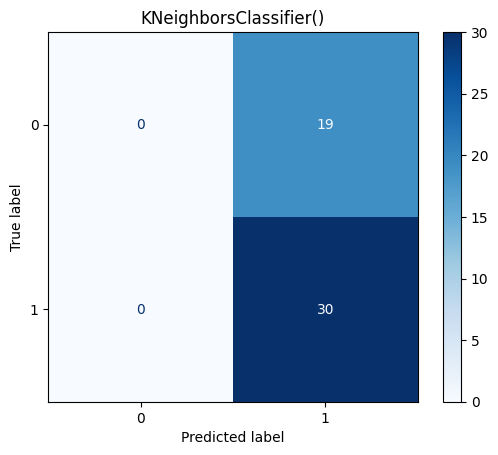

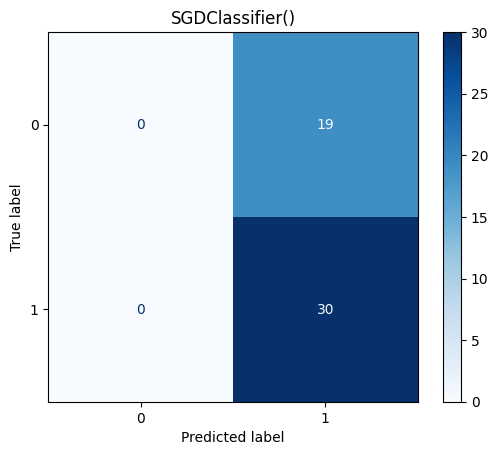

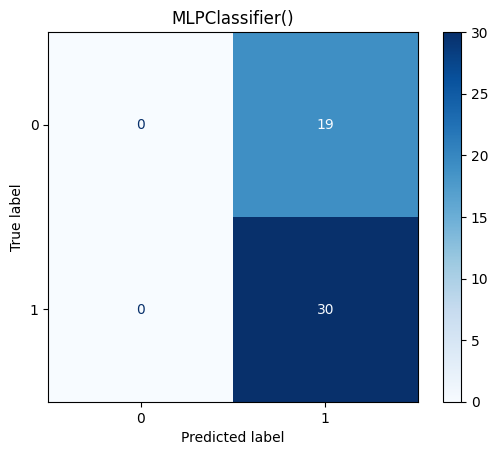

,Model,Precision,Recall,F1-score
0,LogisticRegression(),0.306122,0.5,0.379747
1,DecisionTreeClassifier(),0.306122,0.5,0.379747
2,RandomForestClassifier(),0.306122,0.5,0.379747
3,AdaBoostClassifier(),0.306122,0.5,0.379747
4,ExtraTreesClassifier(),0.306122,0.5,0.379747
5,XGBClassifier(),0.306122,0.5,0.379747
6,LGBMClassifier(),0.306122,0.5,0.379747
7,SVC(),0.306122,0.5,0.379747
8,GaussianNB(),0.306122,0.5,0.379747
9,KNeighborsClassifier(),0.306122,0.5,0.379747


In [10]:
df_report = get_report_all_ml(X_man, y_man, X_test_man, y_test)
df_report

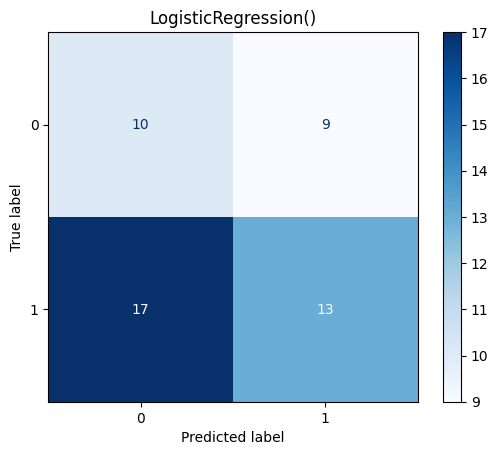

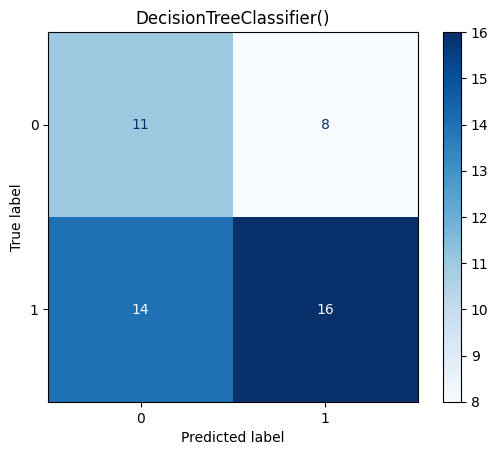

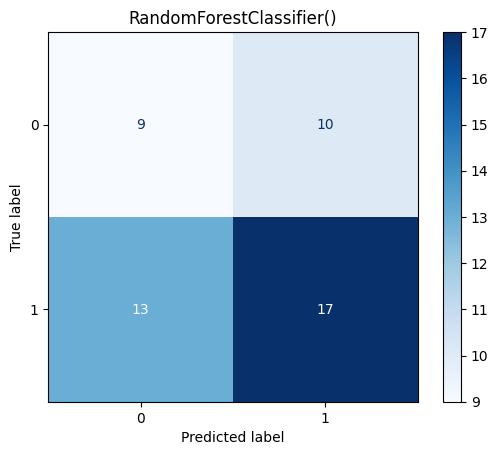

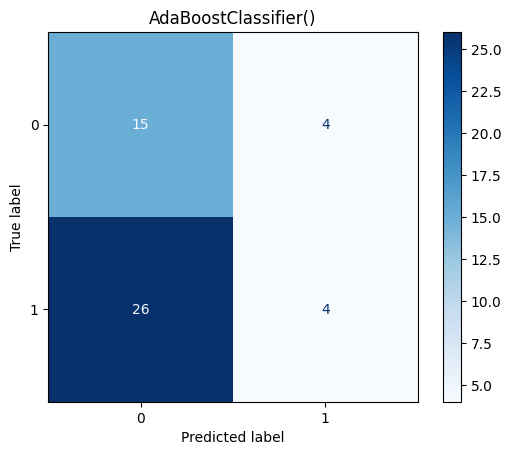

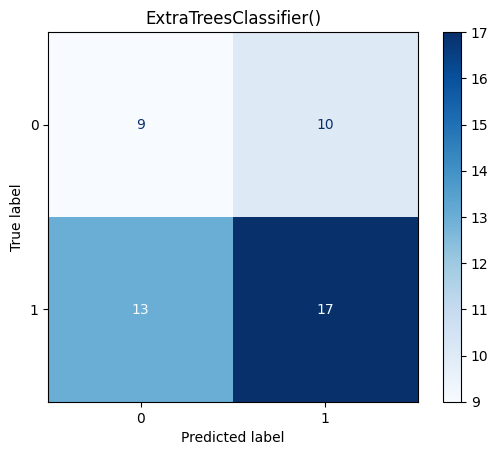

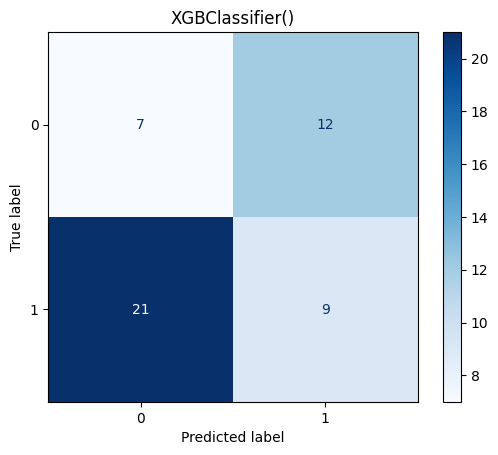

[LightGBM] [Info] Number of positive: 5376, number of negative: 5641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.164287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 338401
[LightGBM] [Info] Number of data points in the train set: 11017, number of used features: 4218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487973 -> initscore=-0.048117
[LightGBM] [Info] Start training from score -0.048117


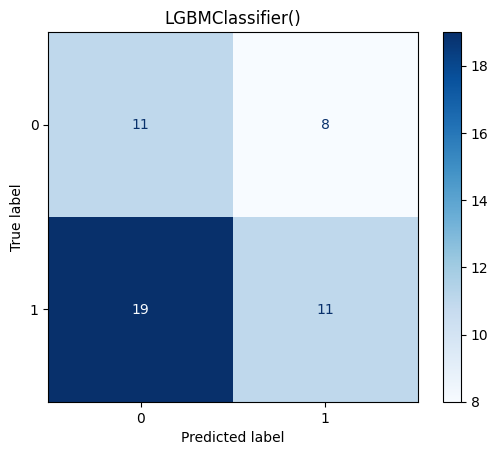

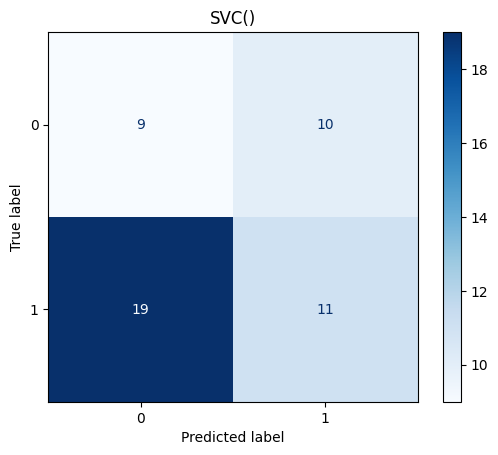

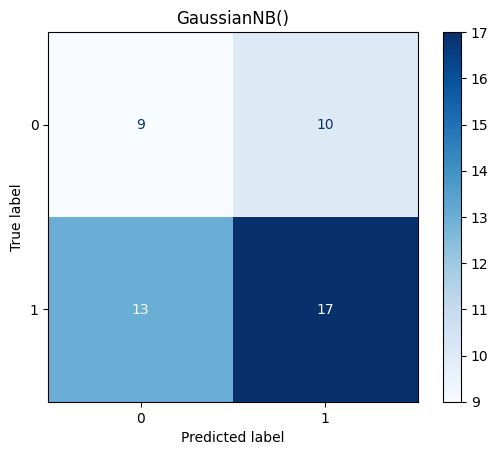

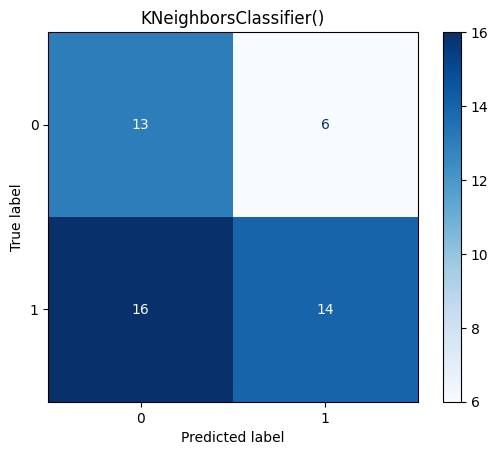

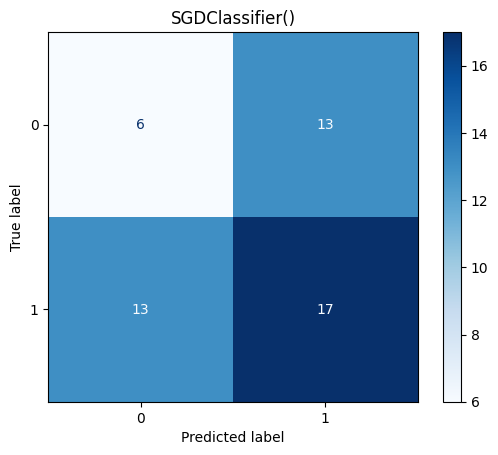

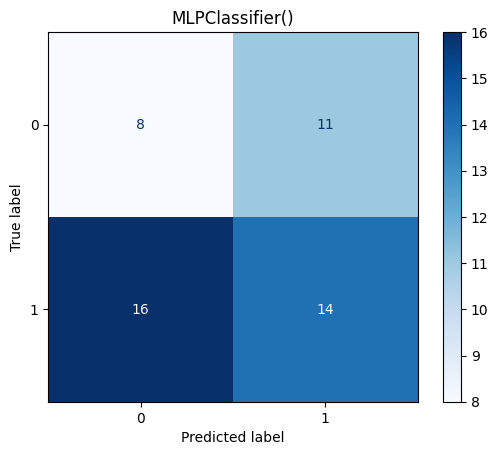

,Model,Precision,Recall,F1-score
0,KNeighborsClassifier(),0.574138,0.575439,0.550833
1,DecisionTreeClassifier(),0.553333,0.556140,0.546296
2,ExtraTreesClassifier(),0.519360,0.520175,0.517758
3,RandomForestClassifier(),0.519360,0.520175,0.517758
4,GaussianNB(),0.519360,0.520175,0.517758
5,LogisticRegression(),0.480640,0.479825,0.467391
6,LGBMClassifier(),0.472807,0.472807,0.448980
7,SGDClassifier(),0.441228,0.441228,0.441228
8,MLPClassifier(),0.446667,0.443860,0.440592
9,SVC(),0.422619,0.420175,0.407176


In [11]:
df_report = get_report_all_ml(X_self, y_self, X_test_self, y_test)
df_report